In [2]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
#from dotenv import load_dotenv
import hvplot.pandas
from pathlib import Path
import seaborn as sns
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading our data into dataFrames
Data includes:
 * Latitude and Longitude of all Canada Provinces~ from [url](https://www.latlong.net/category/provinces-40-60.html).
 * Price range for houses in different provinces of Canada from excel file and avg household income per province using csv file.
 * Stock Prices data for *RioCan(REI-UN.TO)* Real Estate Investment Trust  & *Tricon Residential(TCN.TO)* a Canadian real estate company

In [3]:
#get the latitude and longitude valuse for Canada provinces using url
lat_lon_df = pd.read_html("https://www.latlong.net/category/provinces-40-60.html")

In [4]:
#converting our list into dataFrame
lat_lon_df = pd.DataFrame(np.reshape(lat_lon_df, (10,3)), columns = ['Province', 'Latitude', 'Longitude'])
#remove the unwanted string from our columns
lat_lon_df['Province'] = lat_lon_df['Province'].str.replace(', Canada', '')
#display our latitude & longitude dataFrame
lat_lon_df

,Province,Latitude,Longitude
0,Saskatchewan Province,55.0,-106.0
1,Prince Edward Island,46.25,-63.0
2,Ontario,50.0,-85.0
3,Nova Scotia,45.0,-63.0
4,Alberta,55.0,-115.0
5,British Columbia,53.726669,-127.647621
6,Manitoba,56.415211,-98.739075
7,Newfoundland and Labrador,53.135509,-57.660435
8,New Brunswick,46.49839,-66.159668
9,Quebec Province,53.0,-70.0


In [5]:
# Using the read_csv function and Path module
# create a absorbed_unit_df DataFrame by importing the
#'absorbed-units-price-range-canada-provinces-for-all-dwelling-types-2019-2022-en.xlsx file' from the Resources folder
absorbed_unit_df = pd.read_excel(Path("""./Resources/absorbed-units-price-range-canada-provinces-for-all-dwelling-types-2019-2022-en.xlsx"""),
                                header = 1,
                                sheet_name =None)

#create dataFrame and import average household income for each province across years data
avg_income_df = pd.read_csv(Path('./Resources/avg_household_income_canada.csv'))

In [6]:
#function to fethch the Province names from dictionary of DataFrames-absorbed_unit_df
def getProvince(absorbed_unit_df):
    province = []
    for key in absorbed_unit_df.keys():
        province.append(key)
    return province

In [7]:
canada_housing_data_df = pd.DataFrame()
for i in getProvince(absorbed_unit_df):
    #absorbed_unit_df[i].set_index(['Year','Province'], inplace = True)
    canada_housing_data_df = pd.concat([canada_housing_data_df,absorbed_unit_df[i]], axis = 0)

canada_housing_data_df.set_index('Year', inplace = True)
display(canada_housing_data_df.head())
display(canada_housing_data_df.tail())

,Province,Price Range low($),Price Range high($),Absorbed - Single,Absorbed - Semi,Absorbed - Row,Absorbed - Apartment and other
Year,,,,,,,
2019,Newfoundland and Labrador,149999.0,NaN,0,0,0,0
2019,Newfoundland and Labrador,150000.0,199999.0,0,1,0,0
2019,Newfoundland and Labrador,200000.0,249999.0,18,3,4,10
2019,Newfoundland and Labrador,250000.0,299999.0,54,34,36,1
2019,Newfoundland and Labrador,300000.0,349999.0,72,9,13,0


,Province,Price Range low($),Price Range high($),Absorbed - Single,Absorbed - Semi,Absorbed - Row,Absorbed - Apartment and other
Year,,,,,,,
2022,British Columbia,2850000.0,2899999.0,19,0,0,3
2022,British Columbia,2900000.0,2949999.0,29,2,0,2
2022,British Columbia,2950000.0,2999999.0,51,1,0,12
2022,British Columbia,3000000.0,3049999.0,30,0,0,2
2022,British Columbia,3050000.0,NaN,557,2,2,96


In [8]:
#relevant years for analysis
np.unique(canada_housing_data_df.index)

array([2019, 2020, 2021, 2022])

In [9]:
#Fill NaN valuse with zero
df1=canada_housing_data_df.fillna(value = 0)

In [10]:
#Drop rows where all Dwelling Type Columns{ Absorbed Single, Semi, row & other} contain zeros
canada_housing_data_df = canada_housing_data_df.loc[
    (canada_housing_data_df[['Absorbed - Single','Absorbed - Semi','Absorbed - Row','Absorbed - Apartment and other']] != 0)
    .any(axis = 1)
]

#find the average price range and drop columns Price Range low($) & Price Range high($)
canada_housing_data_df['Avg of Price Range']= canada_housing_data_df[['Price Range low($)', 'Price Range high($)']].mean(axis=1)
canada_housing_data_df.drop(['Price Range low($)', 'Price Range high($)'], axis = 1, inplace = True)


#disply sample data in the dataFrame
display(canada_housing_data_df.head())
display(canada_housing_data_df.tail())

,Province,Absorbed - Single,Absorbed - Semi,Absorbed - Row,Absorbed - Apartment and other,Avg of Price Range
Year,,,,,,
2019,Newfoundland and Labrador,0,1,0,0,174999.5
2019,Newfoundland and Labrador,18,3,4,10,224999.5
2019,Newfoundland and Labrador,54,34,36,1,274999.5
2019,Newfoundland and Labrador,72,9,13,0,324999.5
2019,Newfoundland and Labrador,41,0,5,0,374999.5


,Province,Absorbed - Single,Absorbed - Semi,Absorbed - Row,Absorbed - Apartment and other,Avg of Price Range
Year,,,,,,
2022,British Columbia,19,0,0,3,2874999.5
2022,British Columbia,29,2,0,2,2924999.5
2022,British Columbia,51,1,0,12,2974999.5
2022,British Columbia,30,0,0,2,3024999.5
2022,British Columbia,557,2,2,96,3050000.0


In [11]:
'''
#merge lat_lon_df & canada_housing_data_df to get the lat & long valuse in our dataFrame
canada_housing_data_df = canada_housing_data_df.merge(lat_lon_df, on = 'Province', how = 'inner' )

#merge avg_income_df & canada_housing_data_df to get the avg income valuse in our final dataFrame
canada_housing_data_df = canada_housing_data_df.merge(avg_income_df, on = 'Province', how = 'inner' )
'''

"\n#merge lat_lon_df & canada_housing_data_df to get the lat & long valuse in our dataFrame\ncanada_housing_data_df = canada_housing_data_df.merge(lat_lon_df, on = 'Province', how = 'inner' )\n\n#merge avg_income_df & canada_housing_data_df to get the avg income valuse in our final dataFrame\ncanada_housing_data_df = canada_housing_data_df.merge(avg_income_df, on = 'Province', how = 'inner' )\n"

In [12]:
#reorganize columns in canada_housing_data_df
canada_housing_data_df=canada_housing_data_df.reindex(sorted(canada_housing_data_df.columns, reverse = True), axis=1)

In [13]:
canada_housing_data_df

,Province,Avg of Price Range,Absorbed - Single,Absorbed - Semi,Absorbed - Row,Absorbed - Apartment and other
Year,,,,,,
2019,Newfoundland and Labrador,174999.5,0,1,0,0
2019,Newfoundland and Labrador,224999.5,18,3,4,10
2019,Newfoundland and Labrador,274999.5,54,34,36,1
2019,Newfoundland and Labrador,324999.5,72,9,13,0
2019,Newfoundland and Labrador,374999.5,41,0,5,0
...,...,...,...,...,...,...
2022,British Columbia,2874999.5,19,0,0,3
2022,British Columbia,2924999.5,29,2,0,2
2022,British Columbia,2974999.5,51,1,0,12


Questions:

Q1.trend across the year--> Province wise

Q2.which province suffered major impact-->  benefitted or sufered loss

Q3.most units sold and min units sold --> specific province and Year. --> the price range


Q4.stock beta for real estate companies.

Q5. Market Demand by Price Range: Which price range has the most absorbed units, indicating the highest demand in the market? How does this vary across different provinces?

Q6. Affordability Analysis: Based on the median household income in each province, which price ranges are realistically affordable to most families?

Q7. Income Requirements for Home Ownership: Based on the absorbed units’ price range in each province, what is the estimated annual income required to afford housing? How does this compare across provinces, and how does it align with the actual median annual incomes in those provinces?

In [14]:
# Rename the columns
new_column_names = {
    'Absorbed - Single': 'Single',
    'Absorbed - Semi': 'Semi',
    'Absorbed - Row': 'Row',
    'Absorbed - Apartment and other': 'Apartment and other',
}

canada_housing_data_df = canada_housing_data_df.rename(columns=new_column_names)
canada_housing_data_df.tail(5)

,Province,Avg of Price Range,Single,Semi,Row,Apartment and other
Year,,,,,,
2022,British Columbia,2874999.5,19,0,0,3
2022,British Columbia,2924999.5,29,2,0,2
2022,British Columbia,2974999.5,51,1,0,12
2022,British Columbia,3024999.5,30,0,0,2
2022,British Columbia,3050000.0,557,2,2,96


In [15]:
#calculate the total units sold in each provinces per year.
canada_housing_data_df['Total Absorbed Units']=canada_housing_data_df[["Single","Semi","Row","Apartment and other"]].sum(axis=1)
sum_of_sales=canada_housing_data_df.groupby(['Province','Year'])['Total Absorbed Units'].sum()
#sum_of_sales.hvplot.bar()
sum_of_sales
#Comment from ZHU:
#The purpose of this secetion of code is to show the overall volume in housing market.
#I dont think this graph is infomative enough. since the original data set is Absorbed Units, which is the newly built properties.
#Some provinces may have higher volume in terms of pre-owned houses. There may be provinces that don't build as many new houses.

Province                   Year
Alberta                    2019    17490
                           2020    17518
                           2021    16133
                           2022    16345
British Columbia           2019    22359
                           2020    24778
                           2021    23322
                           2022    20823
Manitoba                   2019     2743
                           2020     2299
                           2021     2348
                           2022     1863
New Brunswick              2019      698
                           2020      611
                           2021      693
                           2022      868
Newfoundland and Labrador  2019      354
                           2020      255
                           2021      305
                           2022      357
Nova Scotia                2019      993
                           2020     1507
                           2021     1317
                         

weighted price for single house =

(# of unit from 1st price range in 2019/total unit in 2019) * midpoint price of 1st price range +

(# of unit from 2nd price range in 2019/total unit in 2019) * midpoint price of 2nd price range +

...

In [16]:
# Define dwelling types
dwelling_types = ['Single', 'Semi', 'Row', 'Apartment and other']

# Initialize an empty DataFrame
housing_price_df = pd.DataFrame()

# For Loop for each dwelling type
for dwelling_type in dwelling_types:
    # Calculate weighted price for each dwelling type
    canada_housing_data_df[f'weighted_price_{dwelling_type}'] = canada_housing_data_df[f'{dwelling_type}'] * canada_housing_data_df['Avg of Price Range']

    # Group by Province and Year and sum up the weighted price
    weighted_price_grouped = canada_housing_data_df.groupby(['Province', 'Year'])[f'weighted_price_{dwelling_type}'].sum()

    # Group by Province and Year and sum up the absorbed units
    absorbed_units_grouped = canada_housing_data_df.groupby(['Province', 'Year'])[f'{dwelling_type}'].sum()

    # Merge the two series into a DataFrame
    merged = pd.DataFrame(weighted_price_grouped)
    merged[f'{dwelling_type}'] = absorbed_units_grouped

    # Calculate the weighted average price
    merged[f'Weighted_Avg_Price_{dwelling_type}'] = merged[f'weighted_price_{dwelling_type}'] / merged[f'{dwelling_type}']

    # Drop the intermediate columns
    merged.drop([f'weighted_price_{dwelling_type}', f'{dwelling_type}'], axis=1, inplace=True)

    # Merge the result into the housing_price_df DataFrame
    if housing_price_df.empty:
        housing_price_df = merged
    else:
        housing_price_df = pd.merge(housing_price_df, merged, on=['Province', 'Year'])

housing_price_df = housing_price_df.reset_index()

In [17]:
housing_price_df.tail()

,Province,Year,Weighted_Avg_Price_Single,Weighted_Avg_Price_Semi,Weighted_Avg_Price_Row,Weighted_Avg_Price_Apartment and other
35,Quebec,2022,577037.187983,405320.470017,510538.991966,424006.628392
36,Saskatchewan,2019,479545.005747,360905.546980,327507.336991,345480.551020
37,Saskatchewan,2020,466820.664504,371153.354701,334920.134921,272958.683673
38,Saskatchewan,2021,472823.871475,385525.815789,362974.183544,453683.800000
39,Saskatchewan,2022,536170.250670,416070.928571,379048.082996,360923.882353


In [18]:
# Define a function to plot trend for each dwelling type
def plot_trend(dwelling_type):
    # The melt function is used to convert the DataFrame from wide format to long format.
    plot_df = pd.melt(housing_price_df, id_vars=['Year', 'Province'], value_vars=[f'Weighted_Avg_Price_{dwelling_type}'])

    # Create a line plot of the WAP over years for each province using the hvplot library
    trend_plot=plot_df.hvplot.line('Year', 'value', by='Province',width=800).opts(yformatter='%.0f',title=f'Price trend for {dwelling_type}')

    return trend_plot

Q1.trend across the year--> Province wise

In [19]:
#Question1
#Q1.trend across the year--> Province wise

# Reset the index of the housing_price_df dataframe
housing_price_df.reset_index(inplace=True)

#Plot Price Trend for all the dwelling type
plot_trend('Single')+plot_trend('Semi')+plot_trend('Row')+plot_trend('Apartment and other')


:Layout
   .NdOverlay.I   :NdOverlay   [Province]
      :Curve   [Year]   (value)
   .NdOverlay.II  :NdOverlay   [Province]
      :Curve   [Year]   (value)
   .NdOverlay.III :NdOverlay   [Province]
      :Curve   [Year]   (value)
   .NdOverlay.IV  :NdOverlay   [Province]
      :Curve   [Year]   (value)

Q2.which province suffered major impact--> benefitted or sufered loss

In [20]:
#Question1
#Q2.which province suffered major impact--> benefitted or sufered loss

#we are using Single house price as reference for return on housing market.
return_house_df=housing_price_df[['Year', 'Province','Weighted_Avg_Price_Single']].copy()
return_house_df.set_index(['Year', 'Province'], inplace=True)
return_house_df['Annual Return %']=return_house_df.groupby('Province')['Weighted_Avg_Price_Single'].pct_change()
return_house_df['Annual Return %']=return_house_df['Annual Return %']*100

return_house_df.tail()

,,Weighted_Avg_Price_Single,Annual Return %
Year,Province,,
2022,Quebec,577037.187983,13.704914
2019,Saskatchewan,479545.005747,NaN
2020,Saskatchewan,466820.664504,-2.653420
2021,Saskatchewan,472823.871475,1.285977
2022,Saskatchewan,536170.250670,13.397458


In [21]:
CGR = ((return_house_df.loc[2022]['Weighted_Avg_Price_Single'] / return_house_df.loc[2019]['Weighted_Avg_Price_Single']) - 1)*100
CGR_df = pd.DataFrame(CGR).rename(columns={"Weighted_Avg_Price_Single": "Cumulative Return %"})
CGR_df.hvplot.bar(rot=30).opts(title="Cumulative growth for each province in the past 4 years")

:Bars   [Province]   (Cumulative Return %)

In [22]:
return_house_df['Annual Return %'].dropna().hvplot.bar(groupby='Year',rot=30,height=400)

:DynamicMap   [Year]
   :Bars   [Year,Province]   (Annual Return %)

Q3.most units sold and min units sold --> specific province and Year. --> the price range

In [23]:
#question3
#most units sold and min units sold --> specific province and Year. --> the price range
#Most popular type of house and price range in each province in each year
sales_house_df = canada_housing_data_df.reset_index()

sales_house_df = sales_house_df.melt(id_vars=['Year','Province', 'Avg of Price Range'],
                                          value_vars=['Single', 'Semi', 'Row', 'Apartment and other'],
                                          var_name='House Type',
                                          value_name='Units Sold')

In [24]:
grouped_sales_house_df=sales_house_df.groupby(['Province', 'Year', 'House Type'])['Units Sold'].sum().reset_index()
grouped_sales_house_df.tail()

,Province,Year,House Type,Units Sold
155,Saskatchewan,2021,Single,1241
156,Saskatchewan,2022,Apartment and other,119
157,Saskatchewan,2022,Row,247
158,Saskatchewan,2022,Semi,140
159,Saskatchewan,2022,Single,1119


In [25]:
idx = grouped_sales_house_df.groupby(['Province', 'Year'])['Units Sold'].idxmax()
most_popular_type_df=grouped_sales_house_df.loc[idx]
most_popular_type_df

,Province,Year,House Type,Units Sold
3,Alberta,2019,Single,8252
7,Alberta,2020,Single,9065
11,Alberta,2021,Single,8941
15,Alberta,2022,Single,9518
16,British Columbia,2019,Apartment and other,11528
20,British Columbia,2020,Apartment and other,14090
24,British Columbia,2021,Apartment and other,12642
28,British Columbia,2022,Apartment and other,12304
35,Manitoba,2019,Single,1639
39,Manitoba,2020,Single,1673


In [26]:
idx_min = grouped_sales_house_df.groupby(['Province', 'Year'])['Units Sold'].idxmin()
min_units_sold_df = grouped_sales_house_df.loc[idx_min]

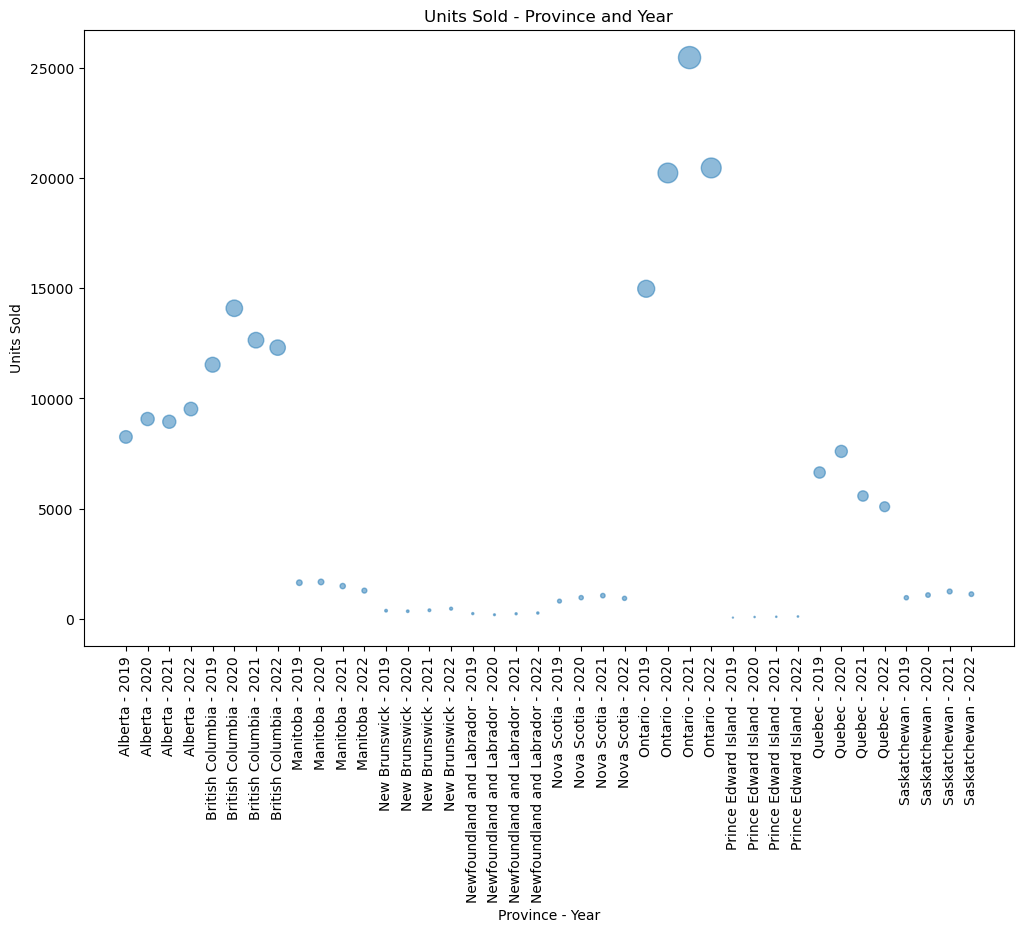

<Figure size 640x480 with 0 Axes>

In [50]:
# Data for bubble plot
province_year = most_popular_type_df['Province'] + ' - ' + most_popular_type_df['Year'].astype(str)
units_sold = most_popular_type_df['Units Sold']
bubble_sizes = units_sold / 100  # Adjust the scaling factor as per your data

# Create a scatter plot with bubble sizes representing units sold
plt.figure(figsize=(12, 8))
plt.scatter(province_year, units_sold, s=bubble_sizes, alpha=0.5)

# Customize the plot
plt.xlabel('Province - Year')
plt.ylabel('Units Sold')
plt.title('Units Sold - Province and Year')

# Adjust the x-axis labels rotation for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

Q4.stock beta for real estate companies.

In [28]:
# Question4
# Q4.stock beta for real estate companies.
# Reading REI.UN
REI_UN_csv = Path("Resources","REI.UN.csv")
REI_UN_df = pd.read_csv(REI_UN_csv, index_col="Date", parse_dates=True)
REI_UN_df.sort_index()
REI_UN_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,24.389999,24.530001,24.299999,24.420000,17.825426,440900
2018-01-03,24.400000,24.610001,24.379999,24.400000,17.810820,761600
2018-01-04,24.469999,24.510000,24.360001,24.459999,17.854610,870800
2018-01-05,24.459999,24.480000,24.299999,24.400000,17.810820,725000
2018-01-08,24.370001,24.559999,24.370001,24.549999,17.920321,483000
2018-01-09,24.620001,24.719999,24.530001,24.530001,17.905716,732100
2018-01-10,24.610001,24.629999,24.020000,24.049999,17.555336,970600
2018-01-11,24.100000,24.129999,23.750000,23.889999,17.438545,678100
2018-01-12,23.900000,24.049999,23.900000,24.010000,17.526138,808600


In [29]:
# Calculate Daily Returns
REI_UN_returns =REI_UN_df['Close'].pct_change().dropna()

REI_UN_returns.name = 'RioCan Real Estate'

display(REI_UN_returns.head())


Date
2018-01-03   -0.000819
2018-01-04    0.002459
2018-01-05   -0.002453
2018-01-08    0.006147
2018-01-09   -0.000815
Name: RioCan Real Estate, dtype: float64

In [30]:
# Reading TCN.TO
TCN_TO_csv = Path("Resources","TCN.TO.csv")
TCN_TO_dF = pd.read_csv(TCN_TO_csv, index_col="Date", parse_dates=True)
TCN_TO_dF.sort_index()
TCN_TO_dF.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,11.57,11.57,11.28,11.40,9.963446,105700
2018-01-03,11.41,11.41,11.17,11.31,9.884787,129100
2018-01-04,11.28,11.38,11.15,11.18,9.771169,132500
2018-01-05,11.16,11.18,11.03,11.05,9.657553,156100
2018-01-08,11.04,11.06,10.85,10.96,9.578891,276500
2018-01-09,10.90,10.96,10.74,10.74,9.386614,463400
2018-01-10,10.70,10.81,10.65,10.69,9.342916,439000
2018-01-11,10.71,10.71,10.57,10.58,9.246779,233100
2018-01-12,10.57,10.80,10.55,10.77,9.412836,228600


In [31]:
# Calculate Daily Returns
TCN_TO_returns =TCN_TO_dF['Close'].pct_change().dropna()
TCN_TO_returns.name = 'Tricon Residential'
display(TCN_TO_returns.head())


Date
2018-01-03   -0.007895
2018-01-04   -0.011494
2018-01-05   -0.011628
2018-01-08   -0.008145
2018-01-09   -0.020073
Name: Tricon Residential, dtype: float64

In [32]:
# Reading sp 500 tsx
sptsx_csv = Path("Resources","sptsx.csv")
sptsx_dF = pd.read_csv(sptsx_csv, index_col="Date", parse_dates=True)
sptsx_dF.sort_index()
sptsx_dF.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,16213.400391,16310.000000,16181.000000,16310.000000,16310.000000,157073400
2018-01-03,16336.700195,16386.300781,16322.599609,16371.599609,16371.599609,196865400
2018-01-04,16385.400391,16421.400391,16344.900391,16412.900391,16412.900391,195975200
2018-01-05,16362.599609,16370.299805,16309.900391,16349.400391,16349.400391,160313100
2018-01-08,16355.400391,16373.500000,16297.900391,16317.700195,16317.700195,166095400
2018-01-09,16351.400391,16358.200195,16309.799805,16319.200195,16319.200195,236911700
2018-01-10,16314.200195,16341.099609,16229.299805,16248.000000,16248.000000,243953300
2018-01-11,16276.200195,16301.400391,16244.900391,16286.900391,16286.900391,231161200
2018-01-12,16296.099609,16323.500000,16278.099609,16308.200195,16308.200195,242891100


In [33]:
# Calculate Daily Returns
sptsx_return =sptsx_dF['Close'].pct_change().dropna()
sptsx_return.name = 'sp tsx'
display(sptsx_dF.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,16213.400391,16310.000000,16181.000000,16310.000000,16310.000000,157073400
2018-01-03,16336.700195,16386.300781,16322.599609,16371.599609,16371.599609,196865400
2018-01-04,16385.400391,16421.400391,16344.900391,16412.900391,16412.900391,195975200
2018-01-05,16362.599609,16370.299805,16309.900391,16349.400391,16349.400391,160313100
2018-01-08,16355.400391,16373.500000,16297.900391,16317.700195,16317.700195,166095400


In [34]:
portfolio_returns = pd.concat([REI_UN_returns, TCN_TO_returns, sptsx_return], axis="columns", join="inner")
portfolio_returns = portfolio_returns.sort_index()
portfolio_returns.tail(10)

,RioCan Real Estate,Tricon Residential,sp tsx
Date,,,
2022-12-15,-0.020141,-0.016651,-0.014634
2022-12-16,-0.005258,-0.035748,-0.008025
2022-12-19,-0.015377,-0.019512,-0.012472
2022-12-20,-0.000488,-0.016915,0.005526
2022-12-21,0.033691,0.019231,0.013684
2022-12-22,-0.010864,0.017875,-0.011313
2022-12-23,0.005731,0.010732,0.008114
2022-12-28,-0.008547,-0.014479,-0.011411
2022-12-29,0.007663,0.026445,0.010465


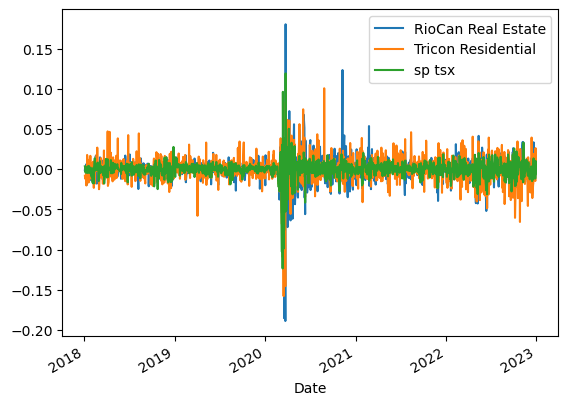

In [51]:
# Plot daily returns of all portfolios
portfolio_returns.plot()

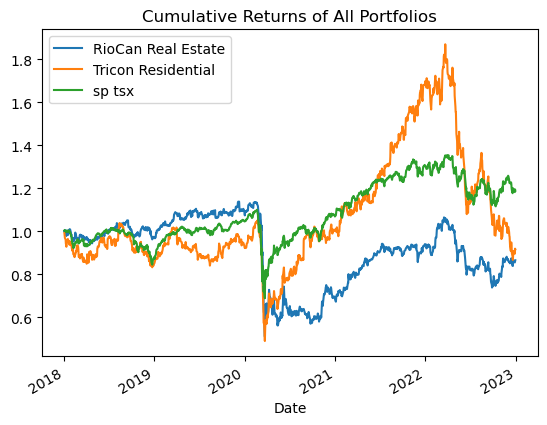

In [52]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns of All Portfolios")
plt.savefig('plot.jpg')

In [37]:
correlation = cumulative_returns.corr()
correlation

,RioCan Real Estate,Tricon Residential,sp tsx
RioCan Real Estate,1.000000,0.140480,0.036479
Tricon Residential,0.140480,1.000000,0.899135
sp tsx,0.036479,0.899135,1.000000


<Axes: >

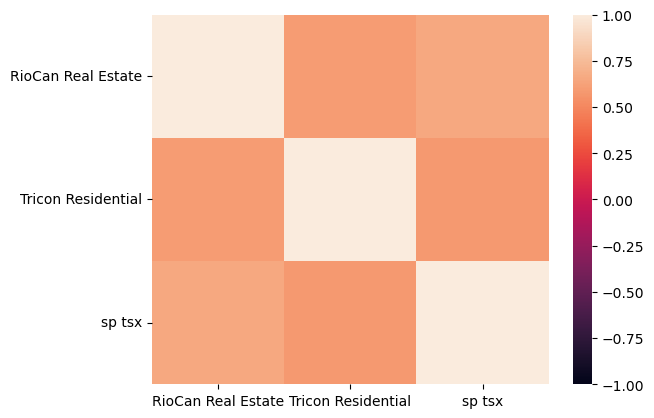

In [38]:
# Calculate the correlation
correlation_matrix = portfolio_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1)

In [39]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_returns.std()
portfolio_std

RioCan Real Estate    0.016631
Tricon Residential    0.017447
sp tsx                0.011387
dtype: float64

In [40]:
# Calculate the daily standard deviation of S&P TSX 60
sp_tsx_std = sptsx_return.std()

# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = {}

# Calculate the standard deviation of all portfolios
# Iterate over the portfolios
for portfolio, std_dev in portfolio_std.iteritems():
    # If the portfolio's standard deviation is greater than that of the S&P TSX 60
    if std_dev > sp_tsx_std:
        riskier_portfolios[portfolio] = std_dev

# Convert the dictionary to a DataFrame for better visualization
riskier_portfolios_df = pd.DataFrame(list(riskier_portfolios.items()), columns=['Portfolio', 'Std Dev'])

print(riskier_portfolios_df)

            Portfolio   Std Dev
0  RioCan Real Estate  0.016631
1  Tricon Residential  0.017447


In [41]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std

RioCan Real Estate    0.264007
Tricon Residential    0.276968
sp tsx                0.180760
dtype: float64

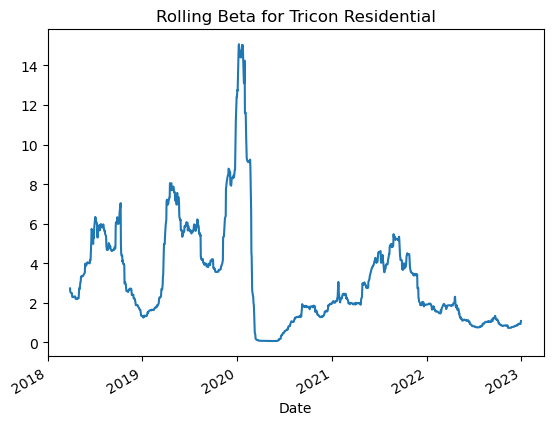

In [53]:
# Calculate covariance of a single portfolio
rolling_covariance = portfolio_returns['Tricon Residential'].rolling(window=60).cov(sptsx_return)
# Calculate variance of S&P TSX

rolling_variance = sptsx_return.rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance.mean() / rolling_variance

# Plot beta trend

rolling_beta.plot(title='Rolling Beta for Tricon Residential')


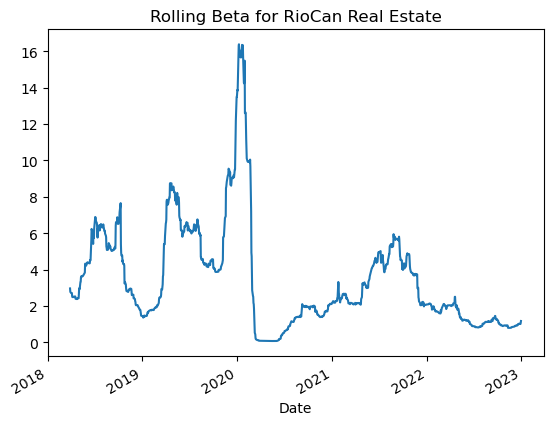

In [54]:
# Calculate covariance of a single portfolio
rolling_covariance = portfolio_returns['RioCan Real Estate'].rolling(window=60).cov(sptsx_return)
# Calculate variance of S&P TSX

rolling_variance = sptsx_return.rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance.mean() / rolling_variance

# Plot beta trend

rolling_beta.plot(title='Rolling Beta for RioCan Real Estate')


Q5. Market Demand by Price Range: Which price range has the most absorbed units, indicating the highest demand in the market? How does this vary across different provinces?

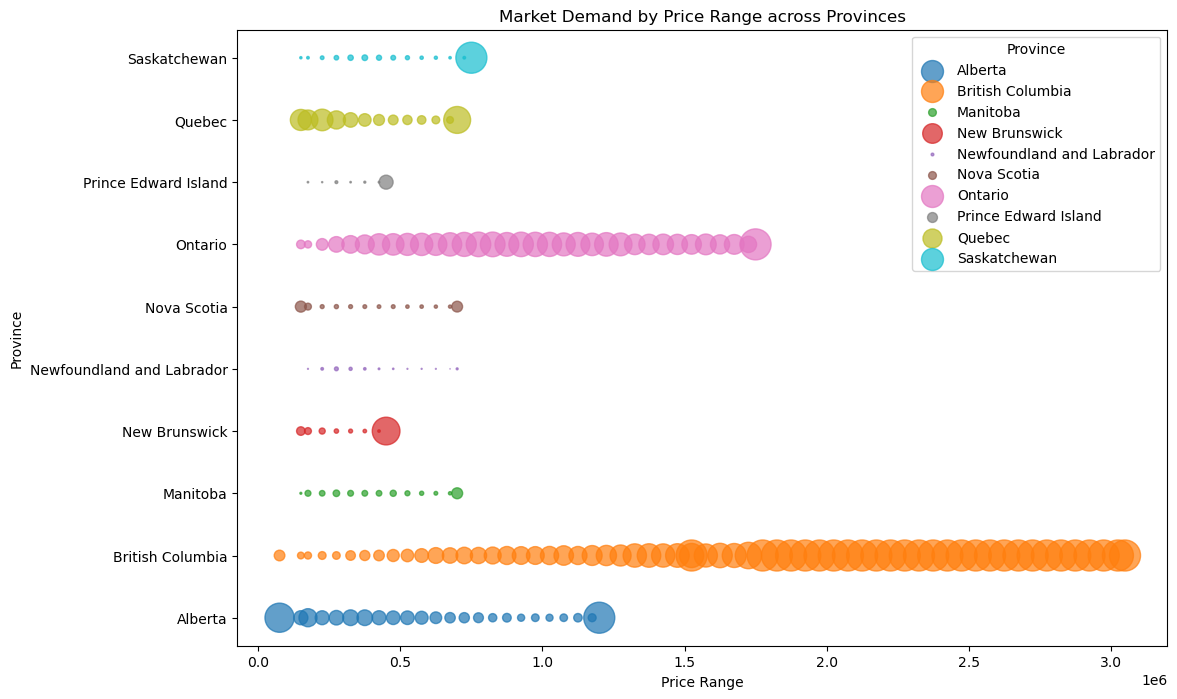

<Figure size 640x480 with 0 Axes>

In [55]:
# Calculate the sum of absorbed units for each price range
demand_data = canada_housing_data_df.groupby('Avg of Price Range')['Total Absorbed Units'].sum()

# Find the price range with the highest demand
highest_demand_price_range = demand_data.idxmax()

# Calculate the demand for each price range in each province
demand_by_province = canada_housing_data_df.groupby(['Province', 'Avg of Price Range'])['Total Absorbed Units'].sum().unstack()
demand_by_province = demand_by_province.fillna(0)
# Get the unique price ranges
price_ranges = demand_by_province.columns

# Get the total absorbed units for each province
total_absorbed_units = demand_by_province.sum()

# Set up the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the demand by price range across provinces using bubble markers
for province in demand_by_province.index:
    x = price_ranges
    y = [province] * len(price_ranges)
    sizes = demand_by_province.loc[province] / total_absorbed_units * 500
    ax.scatter(x, y, s=sizes, alpha=0.7, label=province)

# Customize the plot
ax.set_title('Market Demand by Price Range across Provinces')
ax.set_xlabel('Price Range')
ax.set_ylabel('Province')
ax.legend(title='Province')

plt.show()


Q6. Affordability Analysis: Based on the median household income in each province, which price ranges are realistically affordable to most families?

In [45]:
#Question 6
#Q6. Based on the median household income in each province, which price ranges are realistically affordable to most families?
def cal_affordable_price(row):
    return row['Avg Income'] * 0.3 * 25

avg_income_df['Affordable Price'] = avg_income_df.apply(cal_affordable_price, axis=1)
avg_income_df = avg_income_df.reset_index().set_index(['Year', 'Province'])

housing_price_df = housing_price_df.reset_index().set_index(['Year', 'Province'])
affordable_house_df = pd.concat([housing_price_df, avg_income_df], join='inner', axis=1)

for index in affordable_house_df.index.unique():
    subset_df = affordable_house_df.loc[index]
    province, year = index
    aff_price = subset_df['Affordable Price']
    single_price = subset_df['Weighted_Avg_Price_Single']
    semi_price = subset_df['Weighted_Avg_Price_Semi']
    row_price = subset_df['Weighted_Avg_Price_Row']
    condo_price = subset_df['Weighted_Avg_Price_Apartment and other']

    print(f"For {province} in {year}:")
    print("Affordable Price Range: ${:,.2f}".format(aff_price))
    print("Affordable House Types:")
    if aff_price >= single_price:
        print("   - Single House")
    if aff_price >= semi_price:
        print("   - Semi House")
    if aff_price >= row_price:
        print("   - Row House")
    if aff_price >= condo_price:
        print("   - Apartment and other types")
    if aff_price < condo_price:
        print("   - No Affordable House Types")
    print()


For 2019 in Alberta:
Affordable Price Range: $591,750.00
Affordable House Types:
   - Single House
   - Semi House
   - Row House
   - Apartment and other types

For 2020 in Alberta:
Affordable Price Range: $576,750.00
Affordable House Types:
   - Single House
   - Semi House
   - Row House
   - Apartment and other types

For 2021 in Alberta:
Affordable Price Range: $602,250.00
Affordable House Types:
   - Single House
   - Semi House
   - Row House
   - Apartment and other types

For 2022 in Alberta:
Affordable Price Range: $577,500.00
Affordable House Types:
   - Semi House
   - Row House
   - Apartment and other types

For 2019 in British Columbia:
Affordable Price Range: $472,500.00
Affordable House Types:
   - No Affordable House Types

For 2020 in British Columbia:
Affordable Price Range: $488,250.00
Affordable House Types:
   - No Affordable House Types

For 2021 in British Columbia:
Affordable Price Range: $522,750.00
Affordable House Types:
   - No Affordable House Types

For 

Q7. Income Requirements for Home Ownership: Based on the absorbed units’ price range in each province, what is the estimated annual income required to afford housing? How does this compare across provinces, and how does it align with the actual median annual incomes in those provinces? Just use 2022

In [46]:
# Question7
#filter out 2022 data
affordable_house_2022=affordable_house_df.round(2).loc[2022]
affordable_house_2022

,level_0,index,Weighted_Avg_Price_Single,Weighted_Avg_Price_Semi,Weighted_Avg_Price_Row,Weighted_Avg_Price_Apartment and other,index,Avg Income,Affordable Price
Province,,,,,,,,,
Alberta,3,3,630055.73,500678.49,388931.18,374706.68,49,77000,577500.0
British Columbia,7,7,1742718.32,1292329.71,866879.55,770407.50,54,68500,513750.0
Manitoba,11,11,548671.46,414693.38,384090.41,339926.69,39,64700,485250.0
New Brunswick,15,15,404826.25,367723.40,346222.52,NaN,24,60000,450000.0
Newfoundland and Labrador,19,19,409090.43,315565.54,368749.50,NaN,9,62100,465750.0
Nova Scotia,23,23,563158.98,418447.76,455092.12,495901.20,19,60200,451500.0
Ontario,27,27,988282.69,773639.79,697556.94,632735.62,34,73000,547500.0
Prince Edward Island,31,31,443749.90,407546.74,403905.89,NaN,14,62500,468750.0
Quebec,35,35,577037.19,405320.47,510538.99,424006.63,29,61400,460500.0


In [47]:
# Filter out 2022 data
affordable_house_2022 = affordable_house_df.loc[2022]

# Iterate over each province
for province in affordable_house_2022.index:
    price_range = affordable_house_2022.loc[province].index[0]  # Assuming only one price range per province
    estimated_income_required = affordable_house_2022.loc[province]['Affordable Price']
    actual_median_income = affordable_house_2022.loc[province]['Avg Income']

    print(f"Province: {province}")
    print(f"Price Range: {price_range}")
    print(f"Estimated Annual Income Required: ${estimated_income_required:.2f}")
    print(f"Actual Median Annual Income: ${actual_median_income:.2f}")

    # Compare affordability
    if estimated_income_required <= actual_median_income:
        print("Affordability Comparison: Affordable")
    else:
        print("Affordability Comparison: Not Affordable")

    print()


Province: Alberta
Price Range: level_0
Estimated Annual Income Required: $577500.00
Actual Median Annual Income: $77000.00
Affordability Comparison: Not Affordable

Province: British Columbia
Price Range: level_0
Estimated Annual Income Required: $513750.00
Actual Median Annual Income: $68500.00
Affordability Comparison: Not Affordable

Province: Manitoba
Price Range: level_0
Estimated Annual Income Required: $485250.00
Actual Median Annual Income: $64700.00
Affordability Comparison: Not Affordable

Province: New Brunswick
Price Range: level_0
Estimated Annual Income Required: $450000.00
Actual Median Annual Income: $60000.00
Affordability Comparison: Not Affordable

Province: Newfoundland and Labrador
Price Range: level_0
Estimated Annual Income Required: $465750.00
Actual Median Annual Income: $62100.00
Affordability Comparison: Not Affordable

Province: Nova Scotia
Price Range: level_0
Estimated Annual Income Required: $451500.00
Actual Median Annual Income: $60200.00
Affordability 

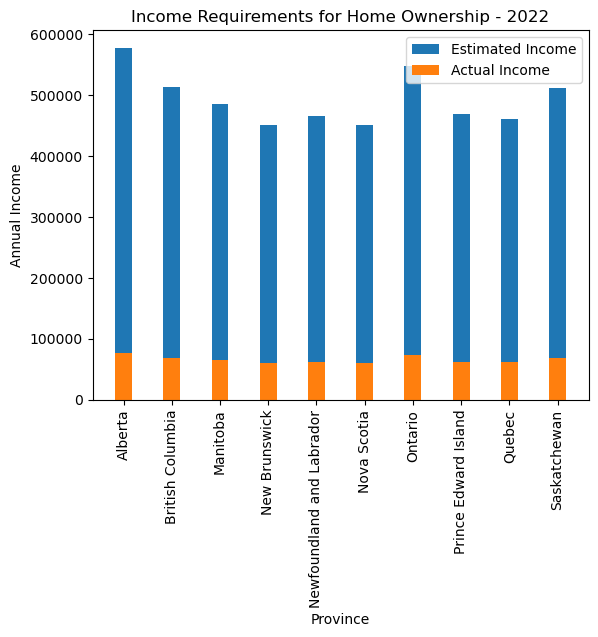

<Figure size 640x480 with 0 Axes>

In [57]:
# Filter out 2022 data
affordable_house_2022 = affordable_house_df.loc[2022]

# Prepare data for visualization
provinces = affordable_house_2022.index
estimated_incomes = affordable_house_2022['Affordable Price']
actual_incomes = affordable_house_2022['Avg Income']

# Set up the bar chart
fig, ax = plt.subplots()
width = 0.35  # Width of the bars

# Plot the estimated incomes
ax.bar(provinces, estimated_incomes, width, label='Estimated Income')

# Plot the actual incomes
ax.bar(provinces, actual_incomes, width, label='Actual Income')

# Set the labels, title, and legend
ax.set_xlabel('Province')
ax.set_ylabel('Annual Income')
ax.set_title('Income Requirements for Home Ownership - 2022')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()
plt.savefig('plot.jpg')